In [52]:
import pandas as pd
pd.set_option("display.max_colwidth", 400)
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
contributions = pd.read_csv('./GR15_public_hackathon/hackathon-contributions-dataset_v2.csv') 
#print(len(contributions))
#contributions[contributions['txn_hash'].isnull()]
contributions = contributions.dropna(how='any')
#print(len(contributions))



In [5]:
contributions[contributions.duplicated(subset=['txn_id', 'timestamp'])].count()

contributions = contributions.drop_duplicates(subset=['txn_id', 'timestamp'])
len(contributions)
#contributions[contributions['txn_id'] == '3077630b7d95c83e8c0bd0d7a2e4a4fa538c124284be1e77dda298db166078ca']

contributions = contributions[contributions['amount_in_usdt'] != 0]

print(len(contributions))

432342


In [66]:

#contributions[contributions['amount_in_usdt'] == 0]


432378
432342


,txn_id,user_id,address,grant_id,chain,txn_hash,network,token,amount_in_usdt,timestamp


In [20]:
contributions[contributions['amount_in_usdt'] < 0.1]
# 0.075009 MATICで送ってたりする。フロントでは制御されているが、contract側は制御されてない？

#df.head(5)
#df[df['chain'] == 'eth_zksync'].head(50)
contributions[contributions['chain'] == 'eth_polygon'].head(50)

,txn_id,user_id,address,grant_id,chain,txn_hash,network,token,amount_in_usdt,timestamp
19723,07f735ca9487e3af5e1b411349d7aa82b223084d4044e605f8d0931d71ecb3e9,887aee92cec4772a9b314d3502e18943a0fea39335ce7349953eaa9e1313efce,0x8b1f85a93ac6e4f62695ea8ef2410d248605feff,5089,eth_zksync,sync-tx:b6ce8f4ef3bac36b34d59ac01384ebd14735dd424160f02ef19da4966d6905f6,mainnet,DAI,0.000000,2022-09-22 17:03:39.429697+00:00
25456,a65d03f80aad1ea5b20010ed264190d00cbbf289d2585322cdedd0a1e719392a,5dd2d6efff6ff1bfb100d24af9fafaa582da23f7be05986c4171bc9bf755fa95,0x7b41cdc657346308fa0c4e9f2aedb8abb2fe4aee,172,eth_polygon,0x675d2e297ae581ba82186800d0b68b88c44efb49a6cc869a3b05e22ee30f0e91,mainnet,MATIC,0.075009,2022-09-22 15:28:30.226968+00:00
25459,b2d5ad7a858d402ee0072ccc91b62ed6d6b89fca40efbbd2e5dc9c148278bc4f,5dd2d6efff6ff1bfb100d24af9fafaa582da23f7be05986c4171bc9bf755fa95,0x7b41cdc657346308fa0c4e9f2aedb8abb2fe4aee,3591,eth_polygon,0x675d2e297ae581ba82186800d0b68b88c44efb49a6cc869a3b05e22ee30f0e91,mainnet,MATIC,0.075009,2022-09-22 15:28:27.067952+00:00
25462,ec399cdb69654f6d63dc6c2310a78919962bde50ef1a40be3fb233aea0564901,5dd2d6efff6ff1bfb100d24af9fafaa582da23f7be05986c4171bc9bf755fa95,0x7b41cdc657346308fa0c4e9f2aedb8abb2fe4aee,4268,eth_polygon,0x675d2e297ae581ba82186800d0b68b88c44efb49a6cc869a3b05e22ee30f0e91,mainnet,MATIC,0.075009,2022-09-22 15:28:26.181981+00:00
25465,d96f9cac6b3a08350120861d2ab200e998b2a5c076849fb8ff1d4015e610241e,5dd2d6efff6ff1bfb100d24af9fafaa582da23f7be05986c4171bc9bf755fa95,0x7b41cdc657346308fa0c4e9f2aedb8abb2fe4aee,4665,eth_polygon,0x675d2e297ae581ba82186800d0b68b88c44efb49a6cc869a3b05e22ee30f0e91,mainnet,MATIC,0.075009,2022-09-22 15:28:25.362604+00:00
...,...,...,...,...,...,...,...,...,...,...
450188,b315c4d873d33af198a40e00e65593caf63f4021557881294a90b23981b1af96,8e33dd484a02b64301cd910fe08b4a3069b8116d46d90d30dd8ec0fb863fac14,0xaed62b3f784015a834b9df9f27f927298704cc7f,7398,eth_zksync,sync-tx:3a8df95299bfec40ffe29b463b00181c24735da2498b293b0d8b21092f7f6f76,mainnet,ETH,0.000000,2022-09-09 08:45:19.143193+00:00
459113,4a69d4e4fbb74d0cc37db18f1f806fa5dfbb6222b06511bd5bd8e225cf7c5dcf,7606980cdc97b3b3be3e10fa96d2c1f1325989f6913542b85770d5a3ae181e67,0xff5d437076788dc1b709f28e8d1794113ec2cb4c,5133,eth_zksync,sync-tx:c5b19c94dba42f7c638136ee102ac148dae974446eab2cc88391647ee22f8c9e,mainnet,ETH,0.000000,2022-09-08 17:25:11.159195+00:00
459198,e88e5c04ee064892a53bbd1e5354a00c4250721da5dfb1bb85e029866b3f1714,391459b013b7c048a2aee0ccec697bc2b74bd841c6415dd24ede051a8d81945b,0x1cfac16b60337e67fa5ba094d8d9e00f291c09a3,3857,eth_zksync,sync-tx:e079410dcc1cb9694f69028762c5a8d607a480aae799bb76f2e66b27cd21d5b3,mainnet,DAI,0.000000,2022-09-08 17:10:10.189984+00:00
459611,5320ba51d03f41cbb8b98a2c9653f532585579ac3b139a4a455798e5ec257b74,f8c9d5d9659b880c08136224897ef0c631e19b1f0f5049c51e9270f5e6d4ebf6,0x7a93750afdfcc232050c8a5a8e26e29f2f3d0840,24,eth_zksync,sync-tx:6140fcb06d47aa35c088dff8dae3b23791229941af646033cf140e513a8b324b,mainnet,ETH,0.000000,2022-09-08 16:10:10.606061+00:00


In [68]:

#df.describe()

#ETHが優位に高い
contributions.groupby(['chain']).count()
contributions.groupby(['chain'])['amount_in_usdt'].describe()

#contributions.groupby(['chain']).boxplot()
#data = contributions.groupby(['chain']).boxplot(column='amount_in_usdt')
#sns.boxplot(x='chain', y='amount_in_usdt', data=contributions)

,count,mean,std,min,25%,50%,75%,max
chain,,,,,,,,
eth_polygon,54216.0,1.796311,7.185259,0.000572,1.007177,1.10000,1.339387,962.82063
eth_std,118192.0,9.115090,192.827597,0.194856,1.060455,1.61685,3.141886,60000.00000
eth_zksync,259934.0,2.005226,11.886605,0.126530,1.004967,1.10000,1.500000,2000.00000


In [53]:
applications = pd.read_json('./GR15_public_hackathon/grants_applications_gr15.json')

applications = applications.transpose()
applications.head()

,grant_id,active,approved,address,title,url,description,created_on
0,6841,False,False,0xDc4C1D5D42f829dfd4b772d3a678CfB178ee6476,4C Labs,https://gitcoin.co/grants/6841/4c-labs,"Project Core:\r\n\t4C hopes to become the Bridge of Web3 and Comics.\r\n\r\n\r\n\r\nProject Introduction:\r\n\t4C is a Web3 community that helps creators create comics.\r\n\r\n\tIn 4C, NFT HOLDER ...",2022-06-24T03:39:54.292-06:00
1,6842,True,True,0xCE41b49d28800De3Ba9925f68D82129dFc4b870B,C# library for accessing NFTs on mobile devices,https://gitcoin.co/grants/6842/c-library-for-accessing-nfts-on-mobile-devices,This is a lightweight open source C# library that uses the Metamask Mobile app SDK and the OpenSea API to get access to the NFTs stored in the users wallet. The library takes these two things and...,2022-06-24T07:41:41.000-06:00
2,6843,False,False,0x8871b4405018e75f08a0bbc9f1fb0241f8b188ae,VDAO - First VC DAO,https://gitcoin.co/grants/6843/vdao-first-vc-dao,"The project is a fund investing (early stage investments, but also securing networks and provide liquidity) in the ecosystem. We aim to build the first VC DAO of the cryptosphere.\r\n\r\n",2022-06-24T09:37:40.087-06:00
3,6844,False,False,0x4C3477e9756610fcB7Dac007C03aE0D666fFc54E,Unisound: Web3.0 sample pack marketplace for music producers,https://gitcoin.co/grants/6844/unisound-web30-sample-pack-marketplace-for-music-,"Unisound enables professional, yet undiscovered music producers to gain exposure among a large community while monetizing their samples.\r\n",2022-06-24T11:00:32.560-06:00
4,6845,False,False,0x9486C5CFE392763A25dC30C9F62f6D21f73d220f,Univerz.io decentralized - marketplace platform,https://gitcoin.co/grants/6845/univerzio-decentralized-marketplace-platform,"Hello Fam we are looking to raise little funds from the community so we can add it to our developing stage and daily upkeep with the finishing phase of the univerz platform, that will benefit the ...",2022-06-24T12:33:04.737-06:00


In [60]:
grants = pd.read_json('./GR15_public_hackathon/gr15_grants.json')
grants = grants.transpose()

grants = grants[grants['grant_id'] != 12]
grants.to_csv('grants.csv', index=False)

In [ ]:
#grants.sort_values('contributor_count', ascending=False).head()
#grants.sum()['amount_received_in_round']

grants['amount_per_contributor'] = grants['amount_received'] / grants['contributor_count']
grants[grants['contribution_count'] > 10].sort_values('amount_per_contributor').head(10)

<AxesSubplot:>

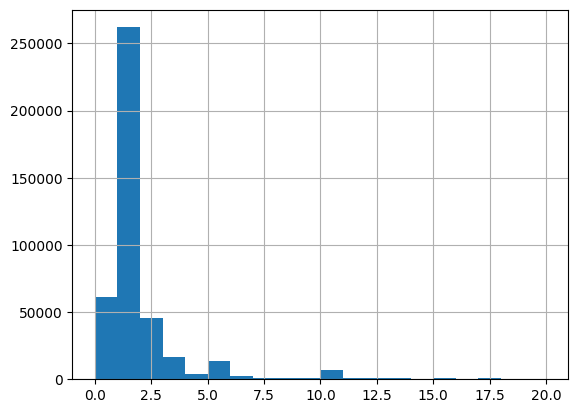

In [24]:
contributions[contributions['amount_in_usdt'] < 20]['amount_in_usdt'].hist(bins=20)

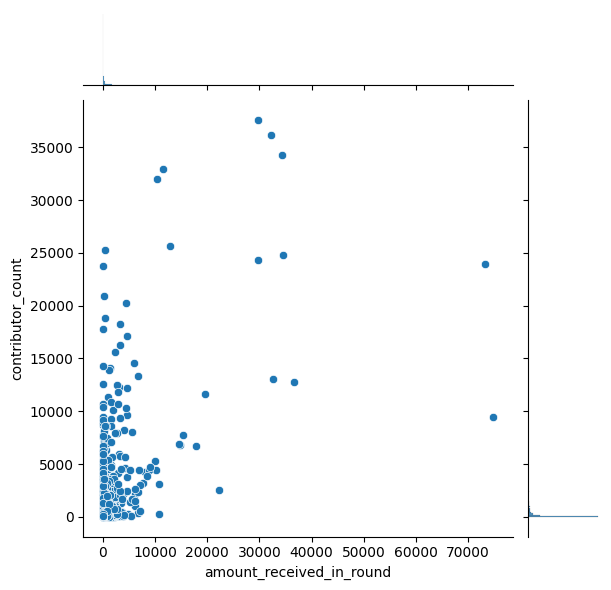

In [12]:
sns.jointplot(x='amount_received_in_round', y='contributor_count', data=grants)
plt.show()

In [51]:
#grants['amount_received_in_round'].hist(bins=30)
#grant_hist =  grants[['contributor_count', 'amount_received_in_round']]
grant_amount = grants[['amount_received', 'amount_received_in_round', 'contribution_count', 'contributor_count']].astype(int)
print(grant_amount.corr())

                          amount_received  amount_received_in_round  \
amount_received                  1.000000                  0.490866   
amount_received_in_round         0.490866                  1.000000   
contribution_count               0.681988                  0.522023   
contributor_count                0.674840                  0.547108   

                          contribution_count  contributor_count  
amount_received                     0.681988           0.674840  
amount_received_in_round            0.522023           0.547108  
contribution_count                  1.000000           0.992382  
contributor_count                   0.992382           1.000000  


In [62]:
#grants[grants['github_project_url'].notnull()].count()
# result: 937
#print(len(grants))
grants = grants.dropna(subset=['github_project_url'])
#print(len(grants))
grants.query('github_project_url.str.startswith("https://github.com")').count()
# count: 896

grant_id                    896
active                      896
title                       896
address                     896
amount_received             896
amount_received_in_round    896
contribution_count          896
contributor_count           896
description                 893
website                     896
github_project_url          896
twitter_handle_2            814
twitter_handle_1            896
twitter_verified            896
created_on                  896
last_update                 896
dtype: int64

In [ ]:
#df[df['chain'] == 'eth_polygon']['txn_hash'].nunique()

df[df['chain'] == 'eth_polygon']['txn_hash'].count()

In [34]:
#df.groupby(['token']).count()
contributions[contributions['chain'] == 'eth_zksync'].groupby(['token'])['txn_id'].count()

contributions[contributions['chain'] == 'eth_polygon'].groupby(['token'])['txn_id'].count()

#df[df['chain'] == 'eth_std'].groupby(['token'])['amount_in_usdt'].sum().sort_values(0, False)

# df[df['chain'] == 'eth_polygon'].groupby(['token'])['amount_in_usdt'].sum().sort_values(0, False)

#pivot table組む

token
DAI       7700
MATIC    34916
USDC      7478
USDT      4549
Name: txn_id, dtype: int64

# Passport

In [28]:
passport = pd.read_csv('./address_passport.csv') 
passport.head()

#show histgram

#merge data

# hasPassport contributor / total contributors per grant

,address,hasPassport,validStampsCount
0,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,True,2
1,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,False,0
2,0x3812801cbf0e41413db4835a5e36228ad45e32bf,True,5
3,0x8f8a255c64ec0109092674a7219f4d10f625e788,False,1
4,0x5e280efdb4dc45ec4aa73494f78b89a21741a9ba,False,0


In [58]:
passport = pd.read_csv('./passport/output.csv') 
passport.head()

,Unnamed: 0,address,valid_stamps_count,stamp_providers,issuance_date
0,0,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,5.0,"[""Brightid"",""Discord"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider"",""NFT""]",2022-09-22T22:41:13.631Z
1,1,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,0.0,NaN,NaN
2,2,0x3812801cbf0e41413db4835a5e36228ad45e32bf,6.0,"[""Twitter"",""Discord"",""Facebook"",""Google"",""Linkedin"",""Github""]",2022-08-28T19:57:54.026Z
3,3,0x8f8a255c64ec0109092674a7219f4d10f625e788,8.0,"[""Github"",""Ens"",""POAP"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider"",""NFT"",""ZkSync"",""SnapshotVotesProvider""]",2022-09-22T23:42:25.904Z
4,4,0x5e280efdb4dc45ec4aa73494f78b89a21741a9ba,0.0,NaN,NaN
